# Matplotlib
## Introduction

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes: 

 1. allow for interactive, cross-platform control of figures and plots
 2. make it easy to produce static raster or vector graphics files without the need for any GUIs. 
 
Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains the [example galleries](https://matplotlib.org/gallery/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and [tutorials](https://matplotlib.org/tutorials/index.html).

## Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](https://matplotlib.org/gallery/index.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

As always, if you have a new and interesting plot that demonstrates a feature of Matplotlib, feel free to submit a concise, well-commented version of the code for inclusion in the gallery.

## Let's get started

First of all, let's import the matplotlib package. In particular we want to import the _pyplot_ submodule of the matplotlib package. After doing that we use the ``%matplotlib inline`` command. The reason for using that is that when we write code to plot, and then execute it with a simple SHIFT-ENTER, the image will appear directly under that code cell.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Anatomy of a plot

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.

Now we will create our figure and axes:

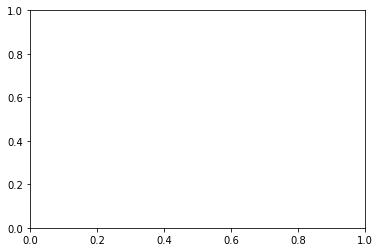

In [4]:
fig = plt.figure()  # a new figure window
ax = fig.subplots() 

As we can see, this creates a blank axes.  Now we can call ``plot`` as we
did before, except now we use the ``plot`` method of ``ax``:

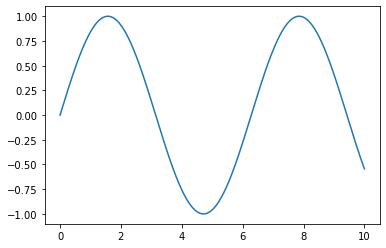

In [5]:
import numpy as np

x = np.linspace(0, 10, 1000)
y = np.sin(x)

ax.plot(x, y)
display(fig)  # this is required to re-display the figure

Let's now over-plot a cosine:

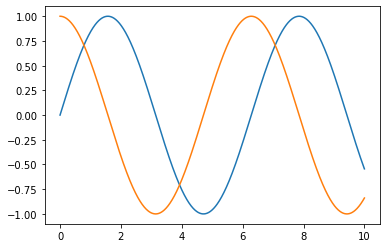

In [6]:
y2 = np.cos(x)
ax.plot(x, y2)

fig  # this works similarly to display(fig)

We can set the axes limits using ``ax.set_xlim``:

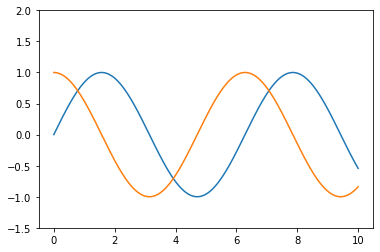

In [7]:
ax.set_ylim(-1.5, 2.0)
fig

And, as before, we can add a legend:

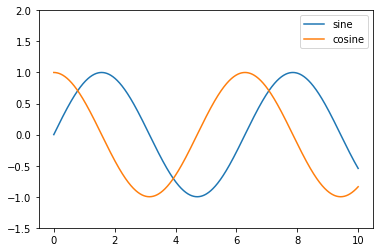

In [8]:
ax.legend(['sine', 'cosine'])
fig

We can similarly annotate the plot using the ``set_*`` methods

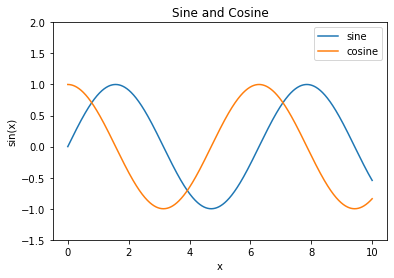

In [9]:
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.set_title("Sine and Cosine")

fig

## Customizing the plot: Line Styles

We can vary the line color or the line symbol:

Options for the color characters are:

     'r' = red
     'g' = green
     'b' = blue
     'c' = cyan
     'm' = magenta
     'y' = yellow
     'k' = black
     'w' = white

Options for line styles are

     '-' = solid
     '--' = dashed
     ':' = dotted
     '-.' = dot-dashed
     '.' = points
     'o' = filled circles
     '^' = filled triangles

and many, many more.

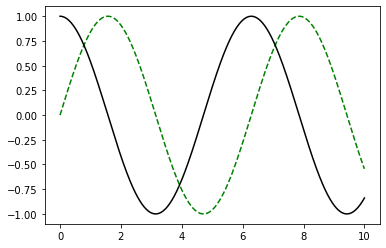

In [10]:
fig = plt.figure()  # a new figure window
ax = fig.subplots() 

# x axis
x = np.linspace(0, 10, 1000)
#sine waveform
y = np.sin(x)
#cosine waveform
y2 = np.cos(x)

#plot sine as a dashed green line
ax.plot(x, y, '--g')

#plot cosine as a solid black line
ax.plot(x, y2, 'k')

## Multi-panel Figures: Subplots

Subplots allows us to create a grid of axes that can show any sort of plot. First we'll create just a single figure and axes. The interface is

      plt.subplots(n_rows, n_cols)

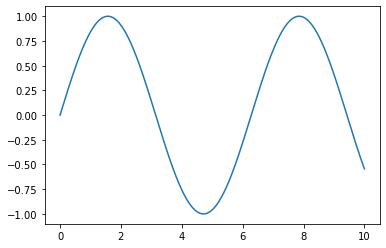

In [11]:
# create just a single figure and axes
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

Let's now create multiple subplots

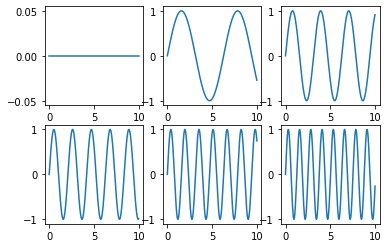

In [12]:
fig, ax = plt.subplots(2, 3)  # 2x3 grid

for i in range(2):
    for j in range(3):
        ax[i, j].plot(x, np.sin((3 * i + j) * x))

In this case, we know that all the plots have the same ``x`` range and the
same ``y`` range, and it would be nice if we could take away all the
unnecessary labels.  This can be done by specifying ``sharex`` or ``sharey``:

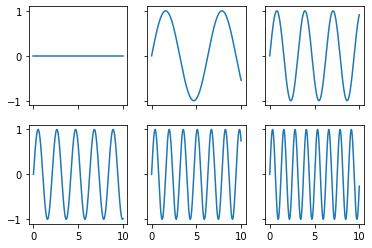

In [13]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)  # 2x3 grid

for i in range(2):
    for j in range(3):
        ax[i, j].plot(x, np.sin((3 * i + j) * x))

## Other plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

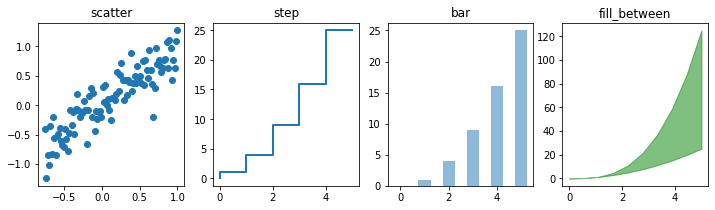

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

#Scatter Plot
xx = np.linspace(-0.75, 1., 100)
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

n = np.array([0,1,2,3,4,5])
axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

x = np.linspace(0, 5, 10)
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

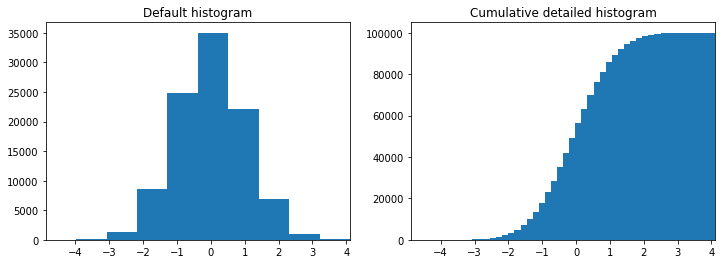

In [15]:
# histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

# <font color="red">EXERCISE 1</font>

Create two arrays `x1` and `x2` of values between 0 and 50. The first one must be of length 50 the second of length 1000 (hint: see function `np.linspace`). Evaluate the sin function (`np.sin()`) on this two arrays and store results in the arrays `y1` and `y2`. Create a plot where `x1` and `y1` are represented by blue circles, and `x2` and `y2` are represented by a dotted black line.  Label the symbols "sampled" and "continuous", and add a legend.  Adjust the y limits to suit your taste.

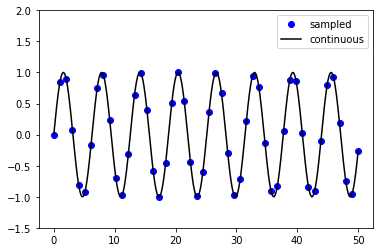

In [16]:
#TO DO

x1 = np.linspace(0,50,50)
y1 = np.sin(x1)

x2 = np.linspace(0,50,1000)
y2 = np.sin(x2)

fig = plt.figure()
ax = fig.subplots()

ax.plot(x1,y1, 'bo')
ax.plot(x2,y2, '-k')

ax.set_ylim(-1.5,2.0)
ax.legend(['sampled', 'continuous'])